In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# impoort sklearn
from sklearn.linear_model import LinearRegression

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
raw_df = pd.read_csv("ECA_data.csv")

# Question 1:

In [3]:
print("The categorical variables in the dataset are GENDER, EDUCATION, MARITAL, RATING. ")
print("The numeric variables in the dataset are LIMIT, BALANCE, INCOME, AGE, S(n), B(n), R(n).")

The categorical variables in the dataset are GENDER, EDUCATION, MARITAL, RATING. 
The numeric variables in the dataset are LIMIT, BALANCE, INCOME, AGE, S(n), B(n), R(n).


# Question 2:

### First data preprocessing task: Detecting and replacing null values within the dataset

In [4]:
# finding missing values of all columns in the data set
raw_df.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [5]:
# finding the mode of education and marital to replace the null values with mode
print(raw_df['EDUCATION'].mode())
print(raw_df['MARITAL'].mode())

0    2.0
Name: EDUCATION, dtype: float64
0    2.0
Name: MARITAL, dtype: float64


In [6]:
# replacing columns with null values with its mode 
for column in ['EDUCATION', 'MARITAL']:
    raw_df[column].fillna(raw_df[column].mode()[0], inplace=True)
    
raw_df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [7]:
# checking if all null values have been replaced
raw_df.isnull().sum()

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

In [8]:
# using the shape to check if rows tally to the output
raw_df.shape

(18769, 24)

### Second data preprocessing task: Converting R3 column from object to int64, and remove [$,] sign

In [9]:
# checking datatypes of all columns
raw_df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

In [10]:
# trying to convert raw_df['R3] to np.int64 but it gives ValueError: invalid literal for int() with base 10: '$0'
# the error causing R3 column to be an object datatype is $
try:
    raw_df['R3'].astype(np.int64)
except ValueError as value_error:
    print(value_error)
    print("There are dollar signs in the dataset, causing R3 to be an object datatype.")

invalid literal for int() with base 10: '$0'
There are dollar signs in the dataset, causing R3 to be an object datatype.


In [11]:
# when replacing $ with "", there is another error which gives ValueError: invalid literal for int() with base 10: '2,620', proving that comma is the issue now
# Therefore replacing [$,] with "" since they were the errors preventing the datatype to be converted to np int64
raw_df["R3"] = raw_df["R3"].replace("[$,]", "", regex=True).astype(np.int64)

# checking if R3 column has been changed from object type to dtype
raw_df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             int64
R4             int64
R5             int64
dtype: object

In [12]:
# converting EDUCATION and MARITAL datatype to int64
raw_df[['EDUCATION', 'MARITAL']] = raw_df[['EDUCATION', 'MARITAL']].astype(np.int64)

# checking if EDUCATION and MARITAL column has been changed from float64 to int64
raw_df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION      int64
MARITAL        int64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             int64
R4             int64
R5             int64
dtype: object

### Third data pre-processing task: Removing duplicated rows from the dataframe

In [13]:
raw_df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2,1,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [14]:
# suspecting that there are duplicates because there are 18769 rows but there are only 18766 IDs
# finding sum of duplicates within the dataframe
count_duplicates = raw_df.duplicated().sum()
print(count_duplicates)

3


In [15]:
# locating the rows of duplicates within the dataframe
display(raw_df.loc[raw_df.duplicated(), :])
print("ID 132, 378 and 420 are duplicated rows")

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
132,132,200000,1270.675,188181,0,1,2,1,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
379,378,240000,39804.975,256476,0,1,2,2,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
422,420,30000,1883.700,32877,1,1,1,2,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0


ID 132, 378 and 420 are duplicated rows


In [16]:
# dropping duplicate rows and rows that contains at least one missing values
raw_df = raw_df.drop_duplicates()

# checking if duplicates have been removed
raw_df.duplicated().sum()

0

### Fourth data pre-processing task: Removing illogical outliers from AGE column

In [17]:
# descriptive statistics summary of raw_df
raw_df.describe() # found min and max value of age to be -1 and 199 respectively.

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
count,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,...,18766.000000,18766.000000,18766.000000,18766.000000,18766.000000,1.876600e+04,18766.000000,18766.000000,18766.000000,18766.000000
mean,9383.500000,168277.399552,9119.056069,177768.780614,0.219226,0.618246,1.790099,1.515880,35.579079,0.128743,...,49979.071832,48162.811681,45019.445646,41052.452414,39617.665299,6.025992e+03,5651.800863,4936.008046,4763.237397,5185.887456
std,5417.421911,129410.434971,13044.255393,143098.786811,0.413733,0.485830,0.732126,0.519524,9.556664,0.954688,...,71920.091796,70311.911232,66098.316428,61686.545919,59899.415291,2.290072e+04,18616.317826,16464.813285,15032.073417,17425.342718
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4692.250000,50000.000000,640.193750,56498.500000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,3079.500000,2845.000000,2510.750000,1950.000000,1429.250000,1.000000e+03,579.000000,316.000000,284.250000,215.250000
50%,9383.500000,140000.000000,3959.550000,148210.500000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,21375.000000,20422.500000,19502.500000,18359.000000,17419.500000,2.131500e+03,2000.000000,1500.000000,1507.000000,1547.000000
75%,14074.750000,240000.000000,11975.031250,256844.750000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,65137.500000,61932.250000,57679.500000,50758.000000,49789.500000,5.002000e+03,5000.000000,4061.500000,4063.750000,4094.500000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,199.000000,7.000000,...,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000


In [18]:
print("Dropping rows that contains values of -1 and 199 from AGE column because it it illogical.")

Dropping rows that contains values of -1 and 199 from AGE column because it does not make sense.


In [19]:
# find all unique values of AGE column
unique_age = raw_df['AGE'].unique()
# sorting values in ascending order
np.sort(unique_age)

array([ -1,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  79,  80, 199], dtype=int64)

In [20]:
# Get names of indexes for which column AGE has value -1 and 199
indexNames = raw_df[ (raw_df['AGE'] == -1) | (raw_df['AGE'] == 199)].index
print(indexNames)
print("There are 10 rows in the dataset with values -1 and 199 under the AGE column.")

Int64Index([535, 664, 1617, 4242, 7833, 15358, 18082, 18165, 18166, 18282], dtype='int64')
There are 10 rows in the dataset with values -1 and 199 under the AGE column.


In [21]:
# drop these row indexes from raw_df
raw_df.drop(indexNames, inplace=True)

In [22]:
# checking if columns with AGE with values -1 and 199 has been successfully removed
new_unique_age = raw_df['AGE'].unique()
np.sort(new_unique_age)

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 79, 80], dtype=int64)

In [23]:
# the dataframe should have 10 less rows now
raw_df.shape

(18756, 24)

# Question 3:

### Discretising the numeric value of all categorical variables into bins in which they are going to be used for plotting the visualisation charts

In [24]:
#creating ranges for the ratings (0: Good, 1: Bad)
ratings_bins = [-1, 0, 1]
ratings_labels = ['Good', 'Bad']
# creating new column RATING_new with pd.cut 
raw_df['RATING_new'] = pd.cut(raw_df.RATING, ratings_bins, labels = ratings_labels, include_lowest = True)
display(raw_df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,RATING_new
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0,0,Bad
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,46407,38874,31324,24031,2000,2000,2000,2000,72000,Good
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,352484,338823,283288,185288,15000,14000,11500,8000,7000,Good
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,200,0,28740,1295,0,0,28740,1565,0,Good
4,5,180000,68.250,166900,0,1,2,1,42,0,...,598,2056,4300,1802,598,2056,4300,1802,3691,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,208365,88004,31237,15980,20000,5003,3047,5000,1000,Good
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,3502,8979,5190,0,3526,8998,129,0,0,Good
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,2758,20878,20582,19357,0,22000,4200,2000,3100,Bad
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,76304,52774,11855,48944,3409,1178,1926,52964,1804,Bad


In [25]:
#creating ranges for the gender (0: Male, 1: Female)
gender_bins = [-1, 0, 1]
gender_labels = ['Male', 'Female']
# creating new column GENDER_new with pd.cut 
raw_df['GENDER_new'] = pd.cut(raw_df.GENDER, gender_bins, labels = gender_labels, include_lowest = True)
display(raw_df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B3,B4,B5,R1,R2,R3,R4,R5,RATING_new,GENDER_new
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0,Bad,Female
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,38874,31324,24031,2000,2000,2000,2000,72000,Good,Male
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,338823,283288,185288,15000,14000,11500,8000,7000,Good,Male
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,0,28740,1295,0,0,28740,1565,0,Good,Male
4,5,180000,68.250,166900,0,1,2,1,42,0,...,2056,4300,1802,598,2056,4300,1802,3691,Good,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,88004,31237,15980,20000,5003,3047,5000,1000,Good,Male
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,8979,5190,0,3526,8998,129,0,0,Good,Male
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,20878,20582,19357,0,22000,4200,2000,3100,Bad,Male
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,52774,11855,48944,3409,1178,1926,52964,1804,Bad,Male


In [26]:
#creating ranges for the education (0: Others, 1: Postgraduate, 2: Tertiary, 3: High School)
education_bins = [-1, 0, 1, 2, 3]
education_labels = ['Others', 'Postgraduate', 'Tertiary', 'High School']
# creating new column EDUCATION_new with pd.cut 
raw_df['EDUCATION_new'] = pd.cut(raw_df.EDUCATION, education_bins, labels = education_labels, include_lowest = True)
display(raw_df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B4,B5,R1,R2,R3,R4,R5,RATING_new,GENDER_new,EDUCATION_new
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,Bad,Female,Postgraduate
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,31324,24031,2000,2000,2000,2000,72000,Good,Male,Tertiary
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,283288,185288,15000,14000,11500,8000,7000,Good,Male,High School
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,28740,1295,0,0,28740,1565,0,Good,Male,Tertiary
4,5,180000,68.250,166900,0,1,2,1,42,0,...,4300,1802,598,2056,4300,1802,3691,Good,Female,Tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,31237,15980,20000,5003,3047,5000,1000,Good,Male,High School
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,5190,0,3526,8998,129,0,0,Good,Male,High School
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,20582,19357,0,22000,4200,2000,3100,Bad,Male,Tertiary
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,11855,48944,3409,1178,1926,52964,1804,Bad,Male,High School


In [27]:
#creating ranges for the marital status (0: Others, 1: Single, 2: Married)
marital_bins = [-1, 0, 1, 2]
marital_labels = ['Others', 'Single', 'Married']
# creating new column MARITAL_new with pd.cut 
raw_df['MARITAL_new'] = pd.cut(raw_df.MARITAL, marital_bins, labels = marital_labels, include_lowest = True)
display(raw_df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B5,R1,R2,R3,R4,R5,RATING_new,GENDER_new,EDUCATION_new,MARITAL_new
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,Bad,Female,Postgraduate,Married
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,24031,2000,2000,2000,2000,72000,Good,Male,Tertiary,Married
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,185288,15000,14000,11500,8000,7000,Good,Male,High School,Single
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,1295,0,0,28740,1565,0,Good,Male,Tertiary,Single
4,5,180000,68.250,166900,0,1,2,1,42,0,...,1802,598,2056,4300,1802,3691,Good,Female,Tertiary,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,15980,20000,5003,3047,5000,1000,Good,Male,High School,Single
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,0,3526,8998,129,0,0,Good,Male,High School,Married
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,19357,0,22000,4200,2000,3100,Bad,Male,Tertiary,Married
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,48944,3409,1178,1926,52964,1804,Bad,Male,High School,Single


### First Visualisation Chart: Mean income of all customers within their age group vs mean income of all customers

In [28]:
#creating ranges for the ages
age_bins = [21, 30, 40, 50, 60, 70, 80]
age_labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
# creating new column agerange with pd.cut 
raw_df['agerange'] = pd.cut(raw_df.AGE, age_bins, labels = age_labels, include_lowest = True)
display(raw_df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,R1,R2,R3,R4,R5,RATING_new,GENDER_new,EDUCATION_new,MARITAL_new,agerange
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,Bad,Female,Postgraduate,Married,21-30
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,2000,2000,2000,2000,72000,Good,Male,Tertiary,Married,31-40
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,15000,14000,11500,8000,7000,Good,Male,High School,Single,51-60
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,0,0,28740,1565,0,Good,Male,Tertiary,Single,51-60
4,5,180000,68.250,166900,0,1,2,1,42,0,...,598,2056,4300,1802,3691,Good,Female,Tertiary,Single,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,20000,5003,3047,5000,1000,Good,Male,High School,Single,31-40
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,3526,8998,129,0,0,Good,Male,High School,Married,41-50
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,0,22000,4200,2000,3100,Bad,Male,Tertiary,Married,31-40
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,3409,1178,1926,52964,1804,Bad,Male,High School,Single,41-50


agerange
21-30    141231.752132
31-40    208638.585431
41-50    189055.446053
51-60    169495.296686
61-70    222478.993464
71-80    285258.000000
Name: INCOME, dtype: float64

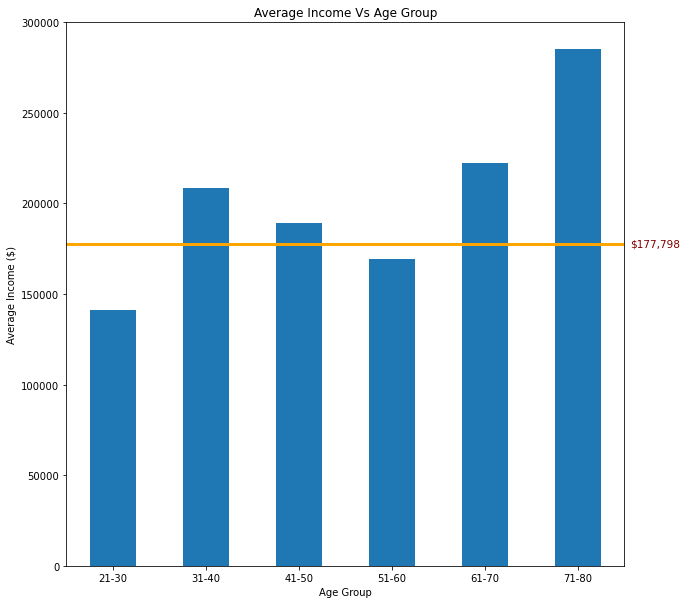

In [29]:
# finding mean income of all customers in the dataset
mean_income = raw_df['INCOME'].mean()
# print(mean_income)

# finding the mean income of the different age groups using .groupby
avg_agegroup_income = raw_df.groupby(['agerange'])['INCOME'].mean()
display(avg_agegroup_income)

fig, ax = plt.subplots()

# plotting bar chart
avg_agegroup_income.plot(kind = 'bar', title = 'Average Income Vs Age Group',
                    ylabel = 'Average Income ($)', xlabel = 'Age Group', figsize = (10 , 10))

# plotting horizontal line using mean_income
plt.axhline(mean_income, color='orange', linewidth=3)

# horizontal line to represent mean income of all customers
ax.text(6.1,mean_income,("${:,.0f}".format(mean_income)),color="maroon",fontsize = 10.5, ha="right",va = 'center')

# plotting y limit
plt.ylim(0,300000)

# rotate x-axis labels vertically
plt.xticks(rotation = 0)
plt.show()

### Second Visualisation Chart: Increasing amount of customers who have exceeded their card limit over five months

In [30]:
# Creating new column, B1_Limit, to identify customers who exceeded their credit card limit
raw_df['B1_Limit'] = raw_df.apply(lambda x: 'ExceedB1' 
                         if x['LIMIT'] <= x['B1']  else 'Under', axis=1)

# Finding the total count of people who exceeded their credit card limit
B1_LIMIT = raw_df.groupby(['B1_Limit'])['B1_Limit'].count()

In [31]:
# Creating new column, B2_Limit, to identify customers who exceeded their credit card limit
raw_df['B2_Limit'] = raw_df.apply(lambda x: 'ExceedB2' 
                         if x['LIMIT'] <= x['B2']  else 'Under', axis=1)

# Finding the total count of people who exceeded their credit card limit
B2_LIMIT = raw_df.groupby(['B2_Limit'])['B2_Limit'].count()

In [32]:
# Creating new column, B3_Limit, to identify customers who exceeded their credit card limit
raw_df['B3_Limit'] = raw_df.apply(lambda x: 'ExceedB3' 
                         if x['LIMIT'] <= x['B3']  else 'Under', axis=1)

# Finding the total count of people who exceeded their credit card limit
B3_LIMIT = raw_df.groupby(['B3_Limit'])['B3_Limit'].count()

In [33]:
# Creating new column, B4_Limit, to identify customers who exceeded their credit card limit
raw_df['B4_Limit'] = raw_df.apply(lambda x: 'ExceedB4' 
                         if x['LIMIT'] <= x['B4']  else 'Under', axis=1)

# Finding the total count of people who exceeded their credit card limit
B4_LIMIT = raw_df.groupby(['B4_Limit'])['B4_Limit'].count()

In [34]:
# Creating new column, B5_Limit, to identify customers who exceeded their credit card limit
raw_df['B5_Limit'] = raw_df.apply(lambda x: 'ExceedB5' 
                         if x['LIMIT'] <= x['B5']  else 'Under', axis=1)

# Finding the total count of people who exceeded their credit card limit
B5_LIMIT = raw_df.groupby(['B5_Limit'])['B5_Limit'].count()

Jan     490
Feb     507
Mar     713
Apr    1085
May    1231
dtype: int64


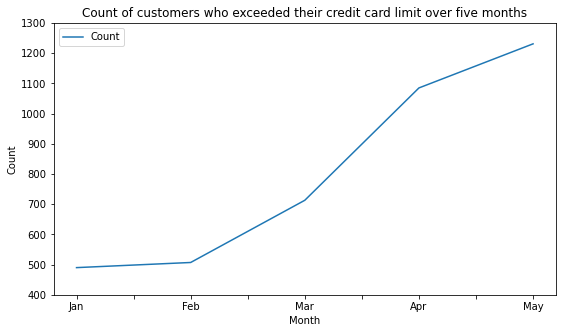

In [35]:
# making a list for xlabels name
month_list = ["Jan", "Feb", "Mar", "Apr", "May"]

# appending all the months of the count of people who exceeded their credit card limit
LIMIT_table = B5_LIMIT.append([B4_LIMIT, B3_LIMIT, B2_LIMIT, B1_LIMIT])
LIMIT_table = LIMIT_table.rename({"ExceedB5":"Jan", "ExceedB4":"Feb", 
                                  "ExceedB3":"Mar", "ExceedB2":"Apr",
                                  "ExceedB1":"May"
                                 })

# Dropping customers who did not exceed their credit card limit
LIMIT_table = LIMIT_table.drop('Under')
print(LIMIT_table)

# creating a dictionary from the dataframe and setting LIMIT as index
linegraph_table = pd.DataFrame({"Month":month_list, "Count":LIMIT_table
                               }).set_index("Month")

# plotting line chart
linegraph_table.plot(kind = 'line', title = 'Count of customers who exceeded their credit card limit over five months',
                    ylabel = 'Count', xlabel = 'Month', figsize = (9 , 5))
# setting y limit
plt.ylim(400,1300)

plt.show()

### Third Visualisation Chart: Distribution of average total limit vs highest education attained

,LIMIT
EDUCATION_new,
Others,184089.820359
Postgraduate,214393.442623
Tertiary,148774.774775
High School,127793.331208


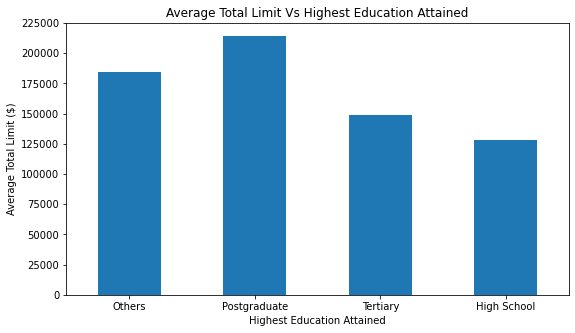

In [36]:
# finding the mean total limit of the different highest education attained by customers using .groupby
avg_education_limit = raw_df.groupby(['EDUCATION_new'])['LIMIT'].mean()

# creating dataframe for better presentation
avg_education_limit_df = pd.DataFrame(avg_education_limit)
display(avg_education_limit_df)

# plotting bar chart
avg_education_limit.plot(kind = 'bar', title = 'Average Total Limit Vs Highest Education Attained',
                    ylabel = 'Average Total Limit ($)', xlabel = 'Highest Education Attained', figsize = (9 , 5))

# plotting y limit
plt.ylim(0,225000)

# rotate x-axis labels vertically
plt.xticks(rotation = 0)
plt.show() 

### Fourth Visualisation Chart: Repayment status of customers who paid promptly and delayed payment over five months

In [37]:
raw_df.describe()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
count,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,...,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,1.875600e+04,18756.000000,18756.000000,18756.000000,18756.000000
mean,9383.015408,168302.606099,9120.739786,177797.591544,0.219343,0.618362,1.790147,1.515888,35.545266,0.128652,...,49987.774579,48170.330028,45024.921199,41063.868362,39629.321764,6.028122e+03,5653.791907,4938.164481,4765.110098,5188.103860
std,5415.971202,129412.045358,13044.875914,143098.555996,0.413813,0.485801,0.732096,0.519534,9.159741,0.954708,...,71921.637085,70311.472270,66095.047877,61697.925645,59909.918407,2.290650e+04,18620.944915,16468.919668,15035.821410,17429.701623
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,21.000000,-1.000000,...,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4693.750000,50000.000000,640.018750,56541.750000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,3085.500000,2853.500000,2513.750000,1951.500000,1430.000000,1.000000e+03,580.000000,316.000000,285.750000,216.750000
50%,9383.500000,140000.000000,3961.737500,148225.500000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,21397.000000,20424.000000,19503.500000,18363.000000,17421.500000,2.133000e+03,2000.000000,1500.000000,1508.500000,1548.500000
75%,14072.250000,240000.000000,11976.956250,256994.750000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,65169.000000,61948.000000,57698.000000,50777.500000,49832.750000,5.002000e+03,5000.000000,4069.000000,4069.750000,4099.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,80.000000,7.000000,...,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000


In [38]:
# Creating new column, S1_repayment_status, to identify customers who delayed paying their bills, paid on time, and paid promptly.
raw_df['S1_repayment_status'] = raw_df.apply(lambda x: 'Prompt' 
                    if x['S1'] == -1 else 'Minimum' if x['S1'] == 0 else 'Delayed', axis=1)

# Finding the total count of people for each category (Delayed, Minimum, Prompt)
S1_repayment_status = raw_df.groupby(['S1_repayment_status'])['S1_repayment_status'].count()

# converting S1_repayment_status to a dataframe with to_frame() 
S1_repayment_status.to_frame()

,S1_repayment_status
S1_repayment_status,
Delayed,2791
Minimum,12364
Prompt,3601


In [39]:
# Creating new column, S2_repayment_status, to identify customers who delayed paying their bills, paid on time, and paid promptly.
raw_df['S2_repayment_status'] = raw_df.apply(lambda x: 'Prompt' 
                    if x['S2'] == -1  else 'Minimum' if x['S2'] == 0 else 'Delayed', axis=1)

# Finding the total count of people for each category (Delayed, Minimum, Prompt)
S2_repayment_status = raw_df.groupby(['S2_repayment_status'])['S2_repayment_status'].count()

# converting S2_repayment_status to a dataframe with to_frame() 
S2_repayment_status.to_frame()


,S2_repayment_status
S2_repayment_status,
Delayed,2619
Minimum,12604
Prompt,3533


In [40]:
# Creating new column, S3_repayment_status, to identify customers who delayed paying their bills, paid on time, and paid promptly.
raw_df['S3_repayment_status'] = raw_df.apply(lambda x: 'Prompt' 
                    if x['S3'] == -1  else 'Minimum' if x['S3'] == 0 else 'Delayed', axis=1)

# Finding the total count of people for each category (Delayed, Minimum, Prompt)
S3_repayment_status = raw_df.groupby(['S3_repayment_status'])['S3_repayment_status'].count()

# converting S3_repayment_status to a dataframe with to_frame() 
S3_repayment_status.to_frame()

,S3_repayment_status
S3_repayment_status,
Delayed,2340
Minimum,12955
Prompt,3461


In [41]:
# Creating new column, S4_repayment_status, to identify customers who delayed paying their bills, paid on time, and paid promptly.
raw_df['S4_repayment_status'] = raw_df.apply(lambda x: 'Prompt' 
                    if x['S4'] == -1  else 'Minimum' if x['S4'] == 0 else 'Delayed', axis=1)

# Finding the total count of people for each category (Delayed, Minimum, Prompt)
S4_repayment_status = raw_df.groupby(['S4_repayment_status'])['S4_repayment_status'].count()

# converting S4_repayment_status to a dataframe with to_frame() 
S4_repayment_status.to_frame()

,S4_repayment_status
S4_repayment_status,
Delayed,1817
Minimum,13609
Prompt,3330


In [42]:
# Creating new column, S5_repayment_status, to identify customers who delayed paying their bills, paid on time, and paid promptly.
raw_df['S5_repayment_status'] = raw_df.apply(lambda x: 'Prompt' 
                    if x['S5'] == -1  else 'Minimum' if x['S5'] == 0 else 'Delayed', axis=1)

# Finding the total count of people for each category (Delayed, Minimum, Prompt)
S5_repayment_status = raw_df.groupby(['S5_repayment_status'])['S5_repayment_status'].count()

# converting S5_repayment_status to a dataframe with to_frame() 
S5_repayment_status.to_frame()

,S5_repayment_status
S5_repayment_status,
Delayed,1803
Minimum,13647
Prompt,3306


,Delayed,Prompt
Jan,1803,3306
Feb,1817,3330
Mar,2340,3461
Apr,2619,3533
May,2791,3601


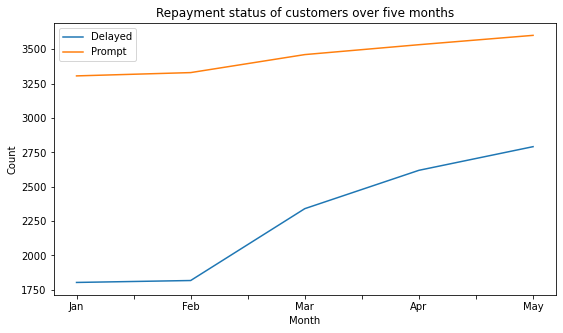

In [43]:
# concatenating all 5 dataframes
repayment_status_table = pd.concat([S5_repayment_status, S4_repayment_status, S3_repayment_status, S2_repayment_status, S1_repayment_status], axis=1)

# dropping Minimum column because it will scale up the graph
repayment_status_table = repayment_status_table.drop(["Minimum"])

# swapping the column and row index
transpose_repayment_status_table = repayment_status_table.transpose()
transpose_repayment_status_table = transpose_repayment_status_table.rename({
    "S5_repayment_status":"Jan", "S4_repayment_status":"Feb", 
    "S3_repayment_status":"Mar", "S2_repayment_status":"Apr", 
    "S1_repayment_status":"May"
})

display(transpose_repayment_status_table)

# plotting line chart
transpose_repayment_status_table.plot(kind = 'line', title = 'Repayment status of customers over five months',
                    ylabel = 'Count', xlabel = 'Month', figsize = (9 , 5))

plt.show()

### Fifth Visualisation Chart: Mean income of males and females with different highest education attained

,Male Income,Female Income
EDUCATION,,
Others,181156.507937,202737.355769
Postgraduate,236035.748125,223244.494576
Tertiary,142057.117307,165012.473741
High School,127475.846343,136659.329167


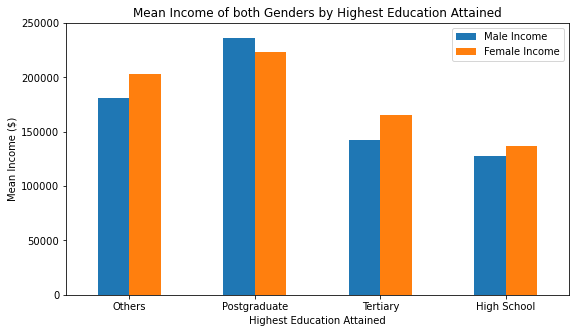

In [54]:
# groupby mean income by gender and highest education level attained
mean_income = raw_df.groupby(["GENDER_new", "EDUCATION_new"])['INCOME'].mean()

# extracting education levels from groupby
education_cat = ["Others", "Postgraduate", "Tertiary", "High School"]

# extracting mean male income from groupby
mean_male = mean_income[:4].tolist()

# extracting mean female income from groupby
mean_female = mean_income[4:].tolist()

# creating a dictionary from the dataframe and setting EDUCATION as index
graph_table = pd.DataFrame({"EDUCATION":education_cat,"Male Income":mean_male,"Female Income":mean_female
                           }).set_index("EDUCATION") #creating a new dataframe table

display(graph_table)

# plotting the bar chart
graph_table.plot(kind = 'bar', title = 'Mean Income of both Genders by Highest Education Attained',
                    ylabel = 'Mean Income ($)', xlabel = 'Highest Education Attained', figsize = (9 , 5))

# setting y limit
plt.ylim(0,250000)

# rotate x-axis labels vertically
plt.xticks(rotation = 0)
plt.show()

# Question 4:

In [45]:
# creating a dataframe for the independent variables
x_pred = raw_df[['LIMIT', 'BALANCE', 'INCOME', 'RATING', 
                 'GENDER', 'EDUCATION','MARITAL','AGE']]

# getting dummies for the categorical variables to be used for linear regression, not dropping first labels will be more representative (i.e. education level will be more represented)
x_pred = pd.get_dummies(x_pred, columns =['RATING', 'GENDER', 'EDUCATION', 'MARITAL'])
display(x_pred)

,LIMIT,BALANCE,INCOME,AGE,RATING_0,RATING_1,GENDER_0,GENDER_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARITAL_0,MARITAL_1,MARITAL_2
0,210000,0.000,235822,30,0,1,0,1,0,1,0,0,0,0,1
1,260000,10928.050,278481,31,1,0,1,0,0,0,1,0,0,0,1
2,400000,65397.850,431993,51,1,0,1,0,0,0,0,1,0,1,0
3,20000,3695.300,22368,58,1,0,1,0,0,0,1,0,0,1,0
4,180000,68.250,166900,42,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,220000,33065.900,225862,39,1,0,1,0,0,0,0,1,0,1,0
18765,150000,294.525,149966,43,1,0,1,0,0,0,0,1,0,0,1
18766,30000,623.875,30327,37,0,1,1,0,0,0,1,0,0,0,1
18767,80000,0.000,94607,41,0,1,1,0,0,0,0,1,0,1,0


In [46]:
# creating a dataframe for the dependent variable, B1
y_pred = raw_df[['B1']]

y_pred

,B1
0,0
1,54074
2,343591
3,21470
4,1260
...,...
18764,192815
18765,1828
18766,3356
18767,78379


In [47]:
# fitting independent variables and dependent variables to the model
model = LinearRegression().fit(x_pred.values, y_pred.values)
print(model.score(x_pred.values, y_pred.values))

0.904307277710319


In [48]:
# coefficients of the model
print(f"coefficients are {np.round(model.coef_, 5)}")

coefficients are [[ 6.92000000e-03  5.23285000e+00 -2.95000000e-03  3.70905300e+01
  -5.72337000e+02  5.72337000e+02  2.16708000e+00 -2.16708000e+00
  -1.42782172e+03  5.91005300e+02  5.14371150e+02  3.22445270e+02
   1.38730860e+02 -5.55618540e+02  4.16887670e+02]]


In [49]:
# rounding coefficients to 5 decimal places
model_coeff = np.round(model.coef_, 5)

# creating dataframe for the coefficients
model_coeff_df = pd.DataFrame(model_coeff.T, index=x_pred.columns)

# renaming column name to coefficient
model_coeff_df.rename(columns = {0:"Coefficient"}, inplace=True)

model_coeff_df

,Coefficient
LIMIT,0.00692
BALANCE,5.23285
INCOME,-0.00295
AGE,37.09053
RATING_0,-572.33700
RATING_1,572.33700
GENDER_0,2.16708
GENDER_1,-2.16708
EDUCATION_0,-1427.82172
EDUCATION_1,591.00530


In [50]:
# creating a loop to predict the values of B1
predicted_b1 = []

for i in range(len(raw_df[['B1']])):
    predicted_b1.append(model.predict(x_pred.values[[i]])[0][0])

In [55]:
# creating a dataframe for predicted_B1 values
predicted_b1_df = pd.DataFrame(predicted_b1, columns=['predicted_B1'])

# changing the datatype to integer
predicted_b1_df = predicted_b1_df.astype(int)

predicted_b1_df.head(15)

,predicted_B1
0,3634
1,59859
2,344984
3,21136
4,2239
5,120979
6,28034
7,38373
8,122630
9,29043


# Question 5:

In [52]:
# intercept of the model
print(f"The intercept is {model.intercept_}")

The intercept is [187.62986961]


In [53]:
#  Multiple linear regression equation
# Ŷ = 187.62987 + 0.00692(LIMIT) + 5.23285(BALANCE) + (-0.00295)(INCOME) + GENDER + EDUCATION + MARITAL + 37.09053(AGE) + RATING

# where RATING = -572 when RATING is Good and RATING = 572 when RATING is Bad
# where GENDER = 2.16708 when GENDER is Male and GENDER = -2.16708 when GENDER is Female
# where EDUCATION = -1427.82172 when EDUCATION is Others, where EDUCATION = 591.00530 when EDUCATION is Postgraduate, where EDUCATION = 514.37115 when EDUCATION is Tertiary, where EDUCATION = 322.44527 when EDUCATION is High School 
# where MARITAL = 138.73086 when MARITAL is Others, where MARITAL = -555.61854 when MARITAL is Single, where MARITAL = 416.88767 when MARITAL is Married 